<a href="https://colab.research.google.com/github/JankoBascarevic/Masinsko-Ucenje/blob/main/Logisticka_regresija_dijabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Neophodne biblioteke

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##Unos podataka

In [2]:
data = pd.read_csv("diabetes_risk_prediction_dataset.csv")
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


##Menjanje vrednosti zbog korelacije

In [14]:
data=data.replace('Female',0)
data=data.replace('Male',1)
data=data.replace('No',0)
data=data.replace('Yes',1)
data=data.replace('Negative',0)
data=data.replace('Positive',1)

##Korelacije izmedju nezavisnih i zavisnih

In [19]:
import seaborn as sns
cor = data.corr().iloc[-1]
display(cor)

Age                   0.108679
Gender               -0.449233
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
weakness              0.243275
Polyphagia            0.342504
Genital thrush        0.110288
visual blurring       0.251300
Itching              -0.013384
Irritability          0.299467
delayed healing       0.046980
partial paresis       0.432288
muscle stiffness      0.122474
Alopecia             -0.267512
Obesity               0.072173
class                 1.000000
Name: class, dtype: float64

##Crtanje grafika zavisnosti zavisne promenljive od nezavisne age, pod uslovima svih ostalih nezavisnih

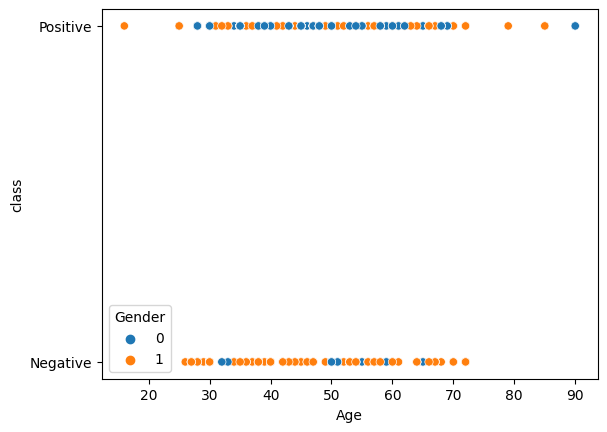

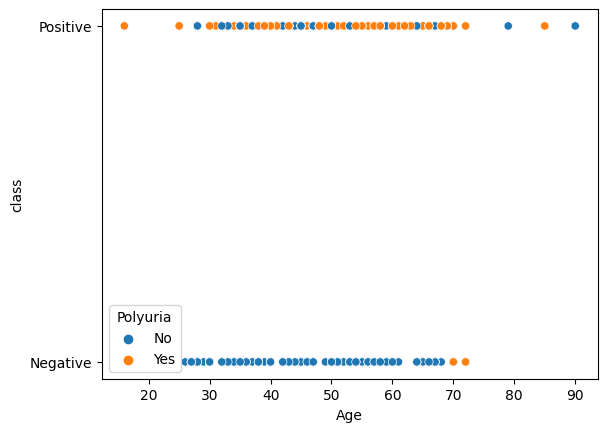

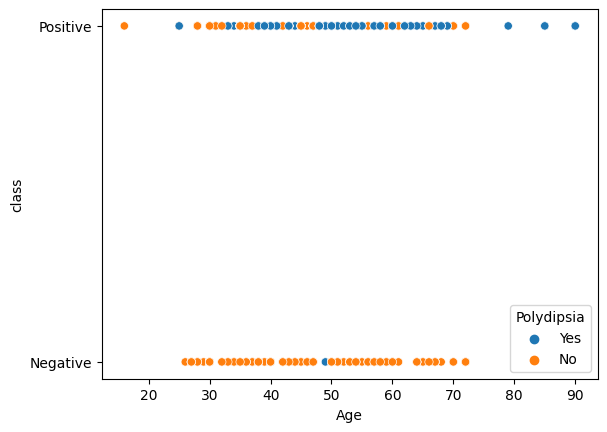

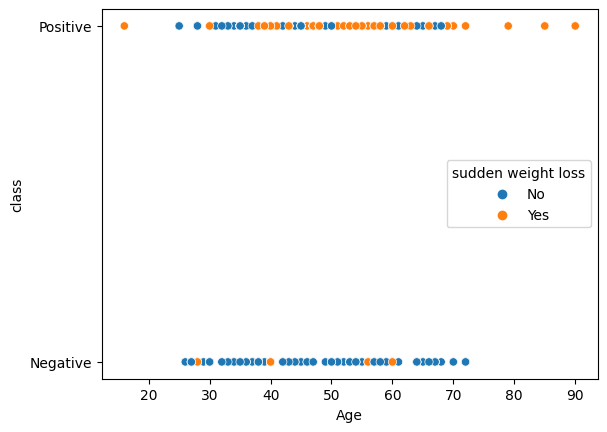

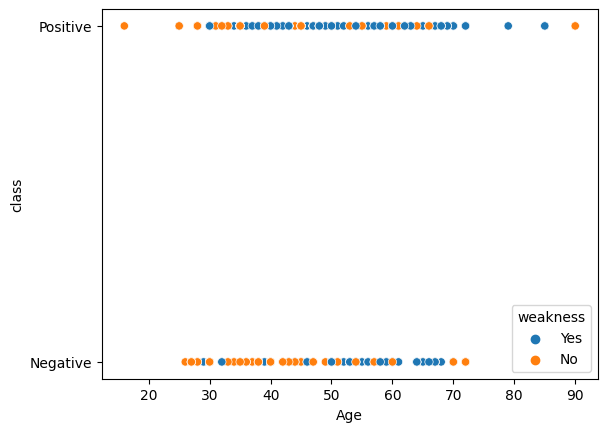

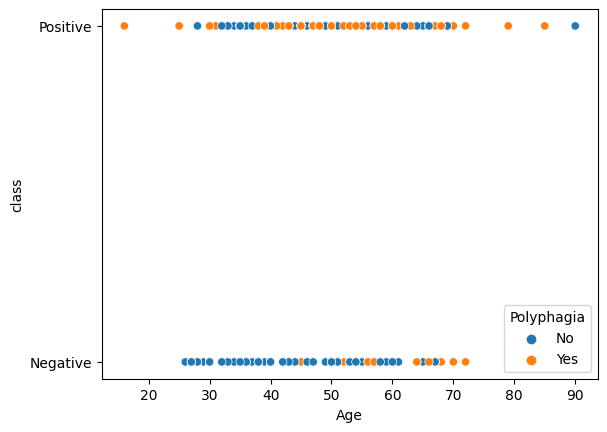

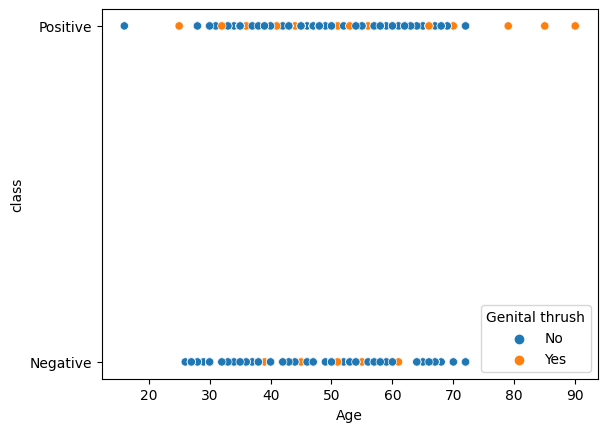

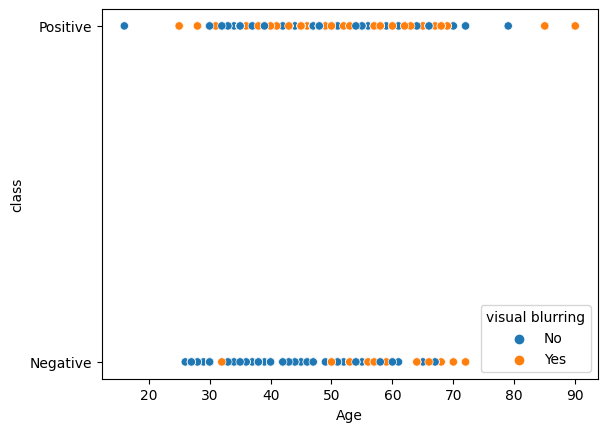

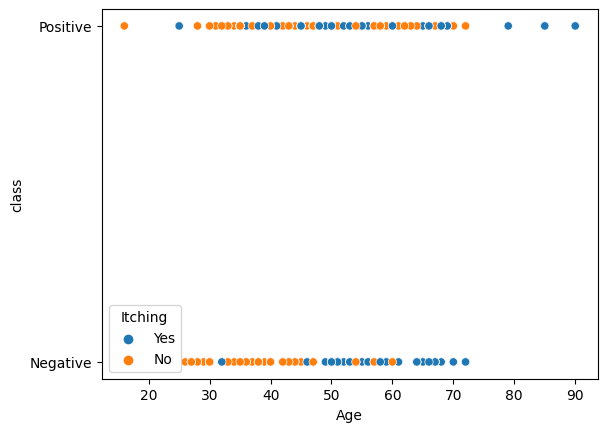

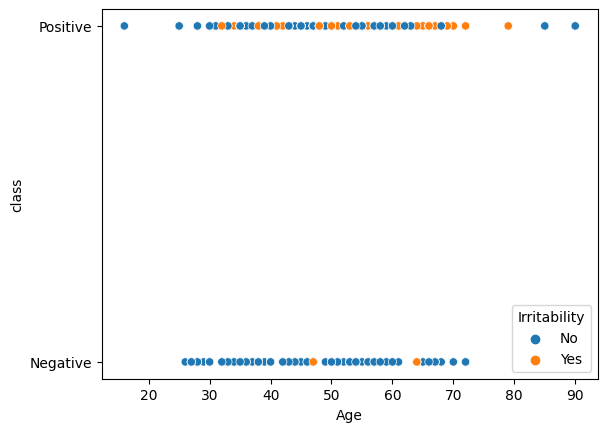

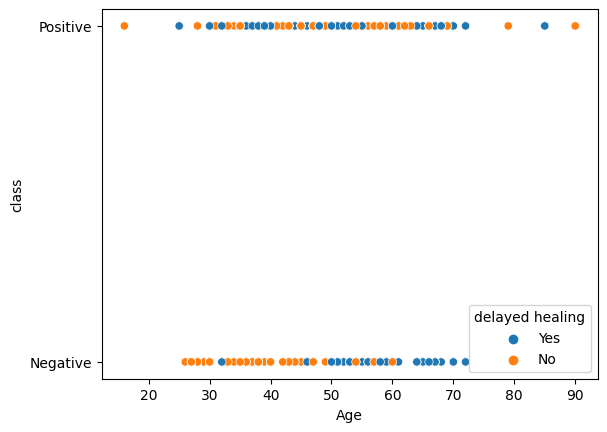

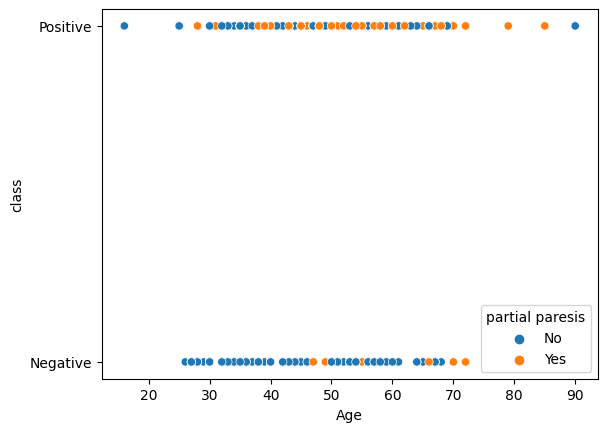

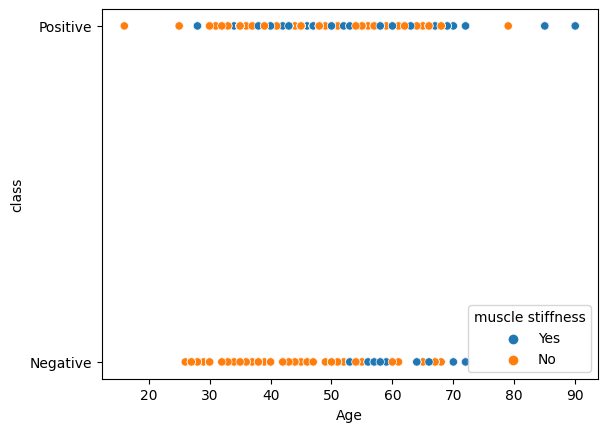

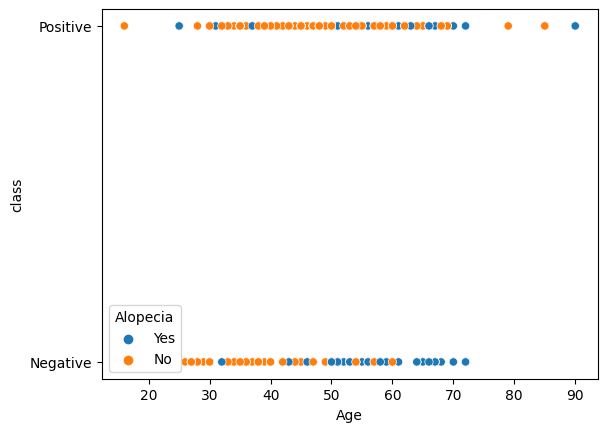

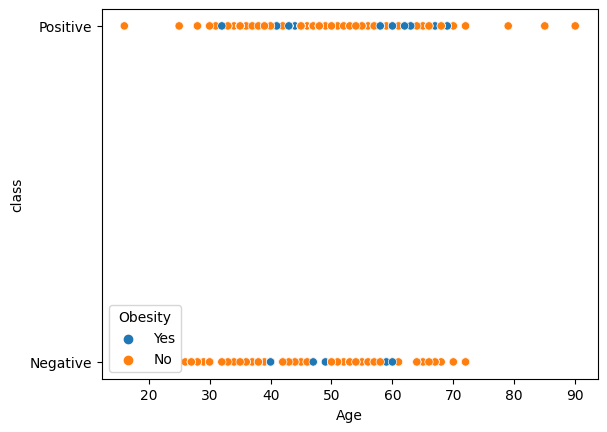

In [13]:
sns.scatterplot(data, x=data['Age'], y=data['class'], hue=data['Gender'])
plt.show()
sns.scatterplot(data, x=data['Age'], y=data['class'], hue=data['Polyuria'])
plt.show()
sns.scatterplot(data, x=data['Age'], y=data['class'],hue=data['Polydipsia'])
plt.show()
sns.scatterplot(data, x=data['Age'], y=data['class'],hue=data['sudden weight loss'])
plt.show()
sns.scatterplot(data, x=data['Age'], y=data['class'],hue=data['weakness'])
plt.show()
sns.scatterplot(data, x=data['Age'], y=data['class'],hue=data['Polyphagia'])
plt.show()
sns.scatterplot(data, x=data['Age'], y=data['class'],hue=data['Genital thrush'])
plt.show()
sns.scatterplot(data, x=data['Age'], y=data['class'],hue=data['visual blurring'])
plt.show()
sns.scatterplot(data, x=data['Age'], y=data['class'],hue=data['Itching'])
plt.show()
sns.scatterplot(data, x=data['Age'], y=data['class'],hue=data['Irritability'])
plt.show()
sns.scatterplot(data, x=data['Age'], y=data['class'],hue=data['delayed healing'])
plt.show()
sns.scatterplot(data, x=data['Age'], y=data['class'],hue=data['partial paresis'])
plt.show()
sns.scatterplot(data, x=data['Age'], y=data['class'],hue=data['muscle stiffness'])
plt.show()
sns.scatterplot(data, x=data['Age'], y=data['class'],hue=data['Alopecia'])
plt.show()
sns.scatterplot(data, x=data['Age'], y=data['class'],hue=data['Obesity'])
plt.show()

Po korelaciji najvise utice Polyuria, jer ima najvecu korelaciju po apsolutnoj vrednosti za zavisnu class

##Trening test split

In [20]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2)

print(len(train))
print(len(test))

416
104


##Pravljenje modela logisticke regresije

In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(train[['Polyuria']], train['class'])

LogisticRegression()

##Racunanje klasifikacionih metrika za model

In [44]:
from sklearn.metrics import classification_report
y_true = test['class']
y_pred = model.predict(test[['Polyuria']])

print(classification_report(y_true, y_pred,target_names=['Positive','Negative']))


              precision    recall  f1-score   support

    Positive       0.88      0.92      0.90        53
    Negative       0.92      0.86      0.89        51

    accuracy                           0.89       104
   macro avg       0.90      0.89      0.89       104
weighted avg       0.90      0.89      0.89       104

